In [1]:
import os
import numpy as np
import pandas as pd
import utilities_dataset as uta
import re
#Automcompletar rápido
%config IPCompleter.greedy=True

import nltk
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer=WordNetLemmatizer()

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
raiz= "C:/Proyectos/X01_sentiment_analyzer"

path_stopwords = raiz+"/01_Documentos/stopwords.txt"
stopwords = [c.strip() for c in open(path_stopwords)]



datos = uta.load_dataset_train(raiz=raiz)
datos_test = uta.load_dataset_val(raiz=raiz)

In [2]:
Y = datos['sentiment'].copy()
X = datos[['text']].fillna("-").copy()

In [ ]:
# variables usadas en el anterior mejor modelo

In [3]:
var_final_s6 = ['feeling',
 'lol',
 'picture',
 'playing',
 'rock',
 'eating',
 'hope',
 'forgot',
 'song',
 'photo',
 'fuck',
 'ah',
 'funny',
 'late',
 'phone',
 'coffee',
 'office',
 'waiting',
 'hot',
 'computer',
 'tho',
 'ugh',
 'wish',
 'hopefully',
 'saturday',
 'mean',
 'site',
 'yes',
 'follower',
 'rest',
 'trip',
 'lot',
 'fan',
 'internet',
 'read',
 'stuff',
 'friend',
 'getting',
 'good',
 'run',
 'great',
 'missing',
 'check',
 'fun',
 'headache',
 '10',
 'head',
 'real',
 'called',
 'best',
 'cant',
 'im',
 'wrong',
 'trying',
 'forward',
 'beautiful',
 'believe',
 'looking',
 'play',
 'heard',
 'mom',
 're',
 'sorry',
 'look',
 'super',
 'anymore',
 'facebook',
 'star',
 'well',
 'hit',
 'house',
 'hoping',
 'love',
 'brother',
 'night',
 'oh',
 'seeing',
 'seen',
 'gone',
 'hour',
 'please',
 'talk',
 'dad',
 'stupid',
 'summer',
 'buy',
 'couldn',
 'boy',
 'own',
 'wa',
 'free',
 'ago',
 'awesome',
 'book',
 'bit',
 'weburl',
 'awww',
 'war',
 'big',
 'leave',
 'cool',
 'lost',
 'lady',
 'nice',
 '30',
 'lmao',
 'stuck',
 'yeah',
 'sunday',
 'cry',
 'dream',
 'thanks',
 'maybe',
 'enjoy',
 'dog',
 'wow',
 'bad',
 'day',
 'guy',
 'following',
 'person',
 'weather',
 'amazing',
 'online',
 'cute',
 'miss',
 'movie',
 'wonderful',
 'dude',
 'job',
 'class',
 'outside',
 'month',
 'aww',
 'start',
 'word',
 'not',
 'goodnight',
 'meet',
 'new',
 'talking',
 'world',
 'win',
 'busy',
 'crazy',
 'sleep',
 'watch',
 'thats',
 'hurt',
 'happy',
 'ill',
 'le',
 'starting',
 'dinner',
 'people',
 'got',
 'name',
 'omg',
 'am',
 'hug',
 'lovely',
 'exam',
 'tell',
 'watching',
 'loved',
 'coming',
 'monday',
 'taking',
 'mommy',
 'follow',
 'drink',
 'listening',
 'holiday',
 'mother',
 'food',
 'sound',
 'car',
 'cause',
 'morning',
 'soon',
 'hear',
 'birthday',
 'ur',
 'lunch',
 'hard',
 'tried',
 'feel',
 'didnt',
 'doe',
 'thank',
 'god',
 'tired',
 'party',
 'till',
 'mum',
 'left',
 'friday',
 'live',
 'stop',
 'family',
 'thinking',
 'excited',
 'plan',
 'hair',
 'welcome',
 'kinda',
 'shopping',
 'suck',
 'post',
 'found',
 'hi',
 'yay',
 'totally',
 'cold',
 'week',
 'sweet',
 'ta',
 'news',
 'wan',
 'rain',
 'weekend',
 'baby',
 'hey',
 'pic',
 'hello',
 'sad',
 'finally',
 'wait',
 'na',
 'isn',
 'boo',
 'eye',
 'tomorrow',
 'bored',
 'hell',
 'life',
 'ya',
 'you',
 'missed',
 'broke',
 'ha',
 'instead',
 'music',
 'finished',
 'yesterday',
 'trek',
 'this',
 'luck',
 'pretty',
 'wasn',
 'video',
 'com',
 'then',
 'ok',
 'dont',
 'break',
 'poor',
 'okay',
 'glad',
 'hate',
 'help',
 'sooo',
 'sick',
 'call',
 'tonight',
 'ready',
 'fair',
 'downfall',
 'gutted',
 'dreary',
 'rainy',
 'crappy',
 'boring',
 'depressing',
 'disappointing',
 'tough',
 'weird',
 'angry',
 'lame',
 'so',
 'expensive',
 'stressed',
 'honest',
 'sadly',
 'sucked']

# CLASES

In [13]:
class Preprocesador_datos:
    def __init__(self,data,variable, stopwords):
        
        self.df_input = data[variable]
        self.output =  None
        self.nombre_final = 'texto'
        self.lista_fcs = [self.feature_weburl]
        self.stopwords = stopwords
        
    def feature_weburl(self,texto:str):
        s = texto.lower().strip()
        ss = re.sub(r"(http|https)\:\/\/\w*\.\w*(\.\w*|\/\w*|~\w*)*(|\/[~\w\d]*|\.w*)", "weburl", s)
        return ss
        
        
    def preproceso_texto(self,texto:str):
            s = texto.lower().strip()
            tokens = nltk.tokenize.word_tokenize(s)
            tokens = [wordnet_lemmatizer.lemmatize(t) for t in tokens]
            # tokens = [t for t in tokens if t not in self.stopwords]
            # tokens = [t for t in tokens if not any(c.isdigit() for c in t)]
            return ' '.join(tokens)

    def _add_fc(self,fcs):
        self.lista_fcs.append(fcs)

    def fit(self):
        X = self.df_input.copy()
        self._add_fc(self.preproceso_texto)
        for fc in  self.lista_fcs:
            X = self.apply_fc(X,fc)
        self.output = X
        
    def apply_fc(self, data, fc):
        return data.apply(lambda x: fc(x))
        
    @property
    def datos_procesado(self):
        aux =  pd.DataFrame(self.output)
        aux.columns = [self.nombre_final]
        return aux

In [14]:
class Sentiment_Vectorizer:
    def __init__(self, params_Tfidf=None ):
        self.nombres_variables = None
        self.params_Tfidf = params_Tfidf
        self._get_parameters()
        self.cv = None
        self.num_variables = None
        self.nombres_variables =None
        
    def _get_parameters(self):
        if self.params_Tfidf is None:
            self.params_Tfidf = {"ngram_range":(1, 1),
                         "min_df":4,
                         "max_df":0.5,             
                         "stop_words": "english",
                         "smooth_idf": True,
                         "use_idf":True ,
                         "lowercase":True,
                         "max_features":300}
            
    def fit_vectorizer(self,data):
        """v1.0"""
        X = data.copy()

        cv=TfidfVectorizer(**self.params_Tfidf)
        cv.fit(X['texto'])
        
        self.nombres_variables = cv.get_feature_names_out().tolist()
        self.num_variables = len(self.nombres_variables)
        self.cv = cv
        return None

    def transform_vectorizer(self, data):
        dfs = self.cv.transform(data["texto"])
        return  pd.DataFrame.sparse.from_spmatrix(dfs,columns = self.nombres_variables  )
        


    def fit_transform_vectorizer(self,data):
        self.fit_vectorizer(data)
        return self.transform_vectorizer( data)


In [15]:
class Sentiment_Evaluator:
    def __init__(self, model, params_model=None):
        
        self.model = model
        self.params_model = params_model
        if params_model is None:
            self.model = self.model()
        else:
            self.model = self.model(**params_model)
        
    def fit(self,train_data,Y, scoring="f1_macro" , cv=10):
        self.results = cross_val_score(self.model,train_data,Y,cv=cv,scoring=scoring)
        self.scoring = scoring 

    
    def print_cv_results(self):
        print("RESULTADOS")
        print("---------------------")
        
        media = np.mean(self.results)
        std = np.std(self.results)
        
        print(f"Metrica {self.scoring} ")
        print(f"media: {media:.3f}")
        print(f"std:{std:.3f}")
        print(f"min:{np.min(self.results):.3f}")
        print(f"max:{np.max(self.results):.3f}")

        

    def mostrar_tabla(self,train_data,Y,test_data=None):
        self.model.fit(train_data,Y)
        
        from sklearn.metrics import ConfusionMatrixDisplay
        
        if test_data is None:
            XX = train_data
        else:
            XX = test_data
            
        ConfusionMatrixDisplay.from_estimator( se_.model, XX, Y, xticks_rotation="vertical" )
        print(classification_report(Y, se_.model.predict(XX)))
    

In [16]:
class New_features_pruebas:
    def __init__(self, data, lista_fcs):
        self.lista_fcs = lista_fcs
        self.data = data
        self.num_datos = len(data)
        self.lista_output = []
        
    def _anadir_fc(self,nombre, fc):
        
        self._check_nombre(nombre)
        self.lista_fcs.append( (nombre,fc))

    def _check_nombre(self,nombre):
        nombre_es_str = isinstance(nombre, str)
        assert nombre_es_str, f"nombre {nombre} tiene que ser string"

        
    def fit(self,nombre, fc):
        self._check_nombre(nombre)
        
        aux = self.data.apply(lambda x: fc(x))
        aux.name = nombre
        return aux
            
    def obtener_variables(self):
        for nombre, fc in self.lista_fcs:
            self.lista_output.append(self.fit(nombre,fc))
        for elemento in self.lista_output:
            assert elemento.size == self.num_datos, f"numero de filas incorrecto, nombre: {elemento.name}"

        df_final = pd.concat(self.lista_output,axis=1)
        return df_final
        

    

# ITERACION 1 SIN STOPWORDS + SIN VAR PREDEFINIDAS
vamos a dejar que el modelo vaya mas libre para buscar nuevos terminos

In [ ]:
def cambio_contracciones(tweet):
    
    re_repl = {
     r"\br\b": "are",
     r"\bu\b": "you",
     r"\bhaha\b": "ha",
     r"\bhahaha\b": "ha",
     r"\bdon`t\b": "do not",
     r"\bdoesn`t\b": "does not",
     r"\bdidn`t\b": "did not",
     r"\bhasn`t\b": "has not",
     r"\bhaven`t\b": "have not",
     r"\bhadn`t\b": "had not",
     r"\bwon`t\b": "wont",
     r"\bwouldn`t\b": "would not",
     r"\bcan`t\b": "cant",
     r"\bcan` t\b": "cant",
     r"\bcannot\b": "cant",
     r"\bI`m\b": "Im",
     r"\bI` m\b": "Im",
     r"\bI am\b": "Im", 
     r"\bUGHHH*\b": "ugh", 
     r"\b[Uu]gh*\b": "ugh",
     r"\bI` ve\b": "I have",  
     r"\b[Ii]` s\b": "it is ",
     r"\b[Ii]`s\b": "it is ",
     r"\bborin\b": "boring",  
     r"\bple+a+se\b": "please",  
     r"in`": "ing",  
     r"\bso+\b": "so", 
     r"\bso+w+y+\b": "sorry", 
     r"\b\#\w*\b": "hastag",
     r"[Yy]outube":" socialnetwork ",
     r"myspace":" socialnetwork ",
     r"twitpic":" socialnetwork ",
        r"latalkradio":" socialnetwork ",
        r"[Tt]witter":" socialnetwork ",
     r"[Tt]witch":" socialnetwork ",
     r"\b: -\\/\b":"emosad",
        "#\\w*":"topico",
     r"\b` ve\b": " have "}
    for r, repl in re_repl.items():
     tweet = re.sub(r, repl, tweet)
    return tweet


def f_replace(text):
    
    text = text.replace("****","fuck")
    return text
    

def conteo_ptos_suspensivos(ss):
    return len(re.findall("...",ss.lower() ))
def conteo_exclamaciones(ss):
    return len(re.findall("!",ss.lower() ))

def conteo_poor(ss):
    return len(re.findall("poo+r",ss.lower() ))

def conteo_palabras(ss):
    return len(ss.split())

In [ ]:
terminos_inutiles=[]

#PARAMETROS
#######################################
lista_palabras = ["not","best","big",'good', 'goods', 'got', 'great',
                 "new",'nobody','number','possible','small',"kind",'well', "going","but","find","so","much"]
stopwords2 = [word for word in stopwords if word not in lista_palabras]
# stopwords2.extend(['this', 'else', 'then', 're'])
stopwords2.extend(terminos_inutiles)
params_model={"max_iter":2000}

params_Tfidf = {"ngram_range":(1, 1),
                         "min_df":4,
                         "max_df":0.5,   
                         "smooth_idf": True,
                         "use_idf":True ,
                         "lowercase":True,
                         "max_features":300 #,
                        #"vocabulary":variables_tfidf
               }

lista_funciones = [("conteo_exclamaciones",conteo_exclamaciones),
                   #("conteo_palabras",conteo_palabras),
                   #("conteo_poor",conteo_poor),
                  ("conteo_ptos_suspensivos",conteo_ptos_suspensivos)
                  ]

#MODELO
#######################################

preprocesador = Preprocesador_datos(X,"text",stopwords2)
preprocesador._add_fc(cambio_contracciones)
preprocesador._add_fc(f_replace)


preprocesador.fit()
df_texto = preprocesador.datos_procesado


sv_ = Sentiment_Vectorizer(params_Tfidf )
x___ = sv_.fit_transform_vectorizer(preprocesador.datos_procesado)

params_Tfidf_2 = {"ngram_range":(2, 2), 
                         "max_df":0.5,   
                         "smooth_idf": True,
                         "use_idf":True ,
                         "lowercase":True,
                         "max_features":20,
                  "vocabulary": ["getting hungry","make shows","too big" ] #basura
               }
sv_2 = Sentiment_Vectorizer(params_Tfidf_2 )
x___2 = sv_2.fit_transform_vectorizer(preprocesador.datos_procesado)



se_ = Sentiment_Evaluator(model = LogisticRegression,params_model=params_model)


if len(lista_funciones)>0:
    
    nfp = New_features_pruebas(X["text"], lista_funciones)
    df_new_features = nfp.obtener_variables()
    df_to_train = pd.concat([x___,x___2,df_new_features.reset_index()],axis=1).set_index("textID")
    columnas_finales = df_to_train.columns.tolist()
else:
    columnas_finales = x___.columns
    df_to_train = x___.copy()

N4_set = set(x___.columns.tolist())

#ENTRANAMIENTO
se_.fit(df_to_train,Y)

#RESULTADOS
se_.mostrar_tabla(df_to_train,Y)
se_.print_cv_results()

In [22]:
def coeficientes_modelo(columnas_finales, se_):
    df_resultados = pd.DataFrame({"palabras": columnas_finales,"coef_nega":list(se_.model.coef_[0]),"coef_neutral":list(se_.model.coef_[1]),"coef_pos":list(se_.model.coef_[2])})
    df_resultados.set_index('palabras',inplace=True)

    df_resultados['abs_coef_nega'] = np.abs(df_resultados['coef_nega'])
    df_resultados['abs_coef_neutral'] = np.abs(df_resultados['coef_neutral'])
    df_resultados['abs_coef_pos'] = np.abs(df_resultados['coef_pos'])

    df_resultados['rank_coef_nega'] = df_resultados['abs_coef_nega'].rank(ascending=False).astype('int')
    df_resultados['rank_coef_neutral'] = df_resultados['abs_coef_neutral'].rank(ascending=False).astype('int')
    df_resultados['rank_coef_pos'] = df_resultados['abs_coef_pos'].rank(ascending=False).astype('int')
    return df_resultados

mod_coe = coeficientes_modelo(columnas_finales, se_)

In [23]:
mod_coe

,coef_nega,coef_neutral,coef_pos,abs_coef_nega,abs_coef_neutral,abs_coef_pos,rank_coef_nega,rank_coef_neutral,rank_coef_pos
palabras,,,,,,,,,
about,0.215493,-0.208756,-0.006737,0.215493,0.208756,0.006737,210,174,302
actually,-0.408818,0.282548,0.126270,0.408818,0.282548,0.126270,135,128,243
after,0.108252,0.009228,-0.117481,0.108252,0.009228,0.117481,260,295,246
again,0.096420,0.254220,-0.350640,0.096420,0.254220,0.350640,265,143,157
all,0.419344,-0.386972,-0.032371,0.419344,0.386972,0.032371,130,85,285
...,...,...,...,...,...,...,...,...,...
getting hungry,0.239904,-0.133294,-0.106610,0.239904,0.133294,0.106610,197,231,256
make shows,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,305,305,305
too big,0.065772,-0.097027,0.031254,0.065772,0.097027,0.031254,272,249,286


In [29]:
 def columns_analysis(viejo,nuevo):
    if isinstance(viejo,list):
        set_viejo = set(viejo)
    if isinstance(nuevo,list):
        set_nuevo = set(nuevo)
        
    string = "Numero de elementos"
    print(f"{string}  set_viejo {len(set_viejo)}")
    print(f"{string} set_nuevo {len(set_nuevo)}")
    print("")
    
    print("Elementos que existen en viejo y no en nuevo:")
    viejo_menos_nuevo = set_viejo.difference(set_nuevo)
    print(viejo_menos_nuevo)
     
    print("Elementos que existen en nuevo y no en viejo:")
    nuevo_menos_viejo =  set_nuevo.difference(set_viejo)
    print(nuevo_menos_viejo )  
    return viejo_menos_nuevo,nuevo_menos_viejo

In [30]:
viejo_menos_nuevo,nuevo_menos_viejo = columns_analysis(var_final_s6,columnas_finales)

Numero de elementos  set_viejo 285
Numero de elementos set_nuevo 305

Elementos que existen en viejo y no en nuevo:
{'boy', 'meet', 'wasn', 'book', 'summer', 'mum', 'computer', 'seeing', 'dinner', 'ah', 'hug', 'crazy', 'saturday', 'playing', 'music', 'tough', 'didnt', 'sucked', 'seen', 'hello', 'anymore', 'welcome', 'site', 'dream', 'outside', '30', 'gutted', 'eye', 'tho', 'taking', 'super', 'kinda', 'break', 'okay', 'lovely', 'name', 'exam', 'eating', 'brother', 'follower', 'month', 'drink', 'depressing', 'headache', 'hit', 'dreary', 'plan', 'cause', 'boo', 'starting', 'cute', 'luck', 'honest', 'le', 'following', 'ago', 'waiting', 'word', 'office', 'talking', 'rainy', 'rest', 'war', 'crappy', 'tried', 'lmao', 'awww', 'beautiful', 'class', 'thats', 'shopping', 'trek', 'picture', 'own', 'dude', 'post', 'excited', 'photo', 'fair', 'boring', 'wonderful', '10', 'called', 'downfall', 'isn', 'finished', 'wrong', 'stupid', 'instead', 'yesterday', 'weird', 'buy', 'dad', 'enjoy', 'stressed', 't

In [36]:
mod_coe.columns

Index(['coef_nega', 'coef_neutral', 'coef_pos', 'abs_coef_nega',
       'abs_coef_neutral', 'abs_coef_pos', 'rank_coef_nega',
       'rank_coef_neutral', 'rank_coef_pos'],
      dtype='object')

In [43]:
mod_coe.loc[list(nuevo_menos_viejo)][["rank_coef_neutral",'coef_neutral','abs_coef_neutral']].\
sort_values(by="rank_coef_neutral").head(50)

,rank_coef_neutral,coef_neutral,abs_coef_neutral
palabras,,,
very,10,-1.205812,1.205812
ever,12,-1.112616,1.112616
but,13,1.073975,1.073975
such,24,-0.907181,0.907181
being,27,-0.839766,0.839766
really,29,-0.819281,0.819281
or,36,0.693799,0.693799
her,45,-0.618181,0.618181
too,48,-0.589552,0.589552


In [45]:
mod_coe.loc[list(nuevo_menos_viejo)][["rank_coef_neutral",'coef_neutral','abs_coef_neutral']].\
sort_values(by="rank_coef_neutral").head(50).query("abs_coef_neutral>0.47").index

Index(['very', 'ever', 'but', 'such', 'being', 'really', 'or', 'her', 'too',
       'other', 'my', 'like', 'did', 'only', 'around', 'same', 'until',
       'guess'],
      dtype='object', name='palabras')

In [46]:
mod_coe.loc["topico"]

coef_nega              0.198555
coef_neutral          -0.110249
coef_pos              -0.088306
abs_coef_nega          0.198555
abs_coef_neutral       0.110249
abs_coef_pos           0.088306
rank_coef_nega       218.000000
rank_coef_neutral    247.000000
rank_coef_pos        263.000000
Name: topico, dtype: float64

In [22]:
def coeficientes_modelo(columnas_finales, se_):
    df_resultados = pd.DataFrame({"palabras": columnas_finales,"coef_nega":list(se_.model.coef_[0]),"coef_neutral":list(se_.model.coef_[1]),"coef_pos":list(se_.model.coef_[2])})
    df_resultados.set_index('palabras',inplace=True)

    df_resultados['abs_coef_nega'] = np.abs(df_resultados['coef_nega'])
    df_resultados['abs_coef_neutral'] = np.abs(df_resultados['coef_neutral'])
    df_resultados['abs_coef_pos'] = np.abs(df_resultados['coef_pos'])

    df_resultados['rank_coef_nega'] = df_resultados['abs_coef_nega'].rank(ascending=False).astype('int')
    df_resultados['rank_coef_neutral'] = df_resultados['abs_coef_neutral'].rank(ascending=False).astype('int')
    df_resultados['rank_coef_pos'] = df_resultados['abs_coef_pos'].rank(ascending=False).astype('int')
    return df_resultados

In [ ]:
mod_coe = coeficientes_modelo(columnas_finales, se_)

## ITERACCION 1B: prueba palabras nuevas, seccion anterior

RESULTADOS:  
0.671 -> 0.675  
HE ENCONTRADO ALGUNAS PALABRAS QUE ESTAN MUY CORRELACIONADAS

In [110]:
ss = "dfs star treck star wars star war wan na"
cambio_contracciones(ss)

'dfs startrek starwar starwar wanna'

In [144]:
def cambio_contracciones(tweet):
    
    re_repl = {
     r"\br\b": "are",
     r"\bu\b": "you",
     r"\bhaha\b": "ha",
     r"\bhahaha\b": "ha",
     r"\bdon`t\b": "do not",
     r"\bdoesn`t\b": "does not",
     r"\bdidn`t\b": "did not",
     r"\bhasn`t\b": "has not",
     r"\bhaven`t\b": "have not",
     r"\bhadn`t\b": "had not",
     r"\bwon`t\b": "wont",
     r"\bwouldn`t\b": "would not",
     r"\bcan`t\b": "cant",
     r"\bcan` t\b": "cant",
     r"\bcannot\b": "cant",
     r"\bI`m\b": "Im",
     r"\bI` m\b": "Im",
     r"\bI am\b": "Im", 
     r"\bUGHHH*\b": "ugh", 
     r"\b[Uu]gh*\b": "ugh",
     r"\bI` ve\b": "I have",  
     r"\b[Ii]` s\b": "it is ",
     r"\b[Ii]`s\b": "it is ",
     r"\bborin\b": "boring",  
     r"\bple+a+se\b": "please",  
     r"in`": "ing",  
     r"\bso+\b": "so", 
     r"\bso+w+y+\b": "sorry", 
     r"\b\#\w*\b": "hastag",
     r"[Yy]outube":" socialnetwork ",
     r"myspace":" socialnetwork ",
     r"twitpic":" socialnetwork ",
     r"latalkradio":" socialnetwork ",
     r"[Tt]witter":" socialnetwork ",
     r"[Tt]witch":" socialnetwork ",
     r"\b: -\\/\b":"emosad",
      "#\\w*":"topico",
     r"\bstar wars\b":" starwar ", 
     r"\bstar war\b":" starwar ", 
     r"\bstar trek\b":" startrek ",  
     r"\bstar treck\b":" startrek ",
     # r"\bhappy mother day\b":" happymotherday ",  
     r"\bwan na\b": " wanna ",
     r"\bgot ta\b":" gotta ",   
     r"\b` ve\b": " have "}
    for r, repl in re_repl.items():
     tweet = re.sub(r, repl, tweet)
    return tweet


def f_replace(text):
    
    text = text.replace("****","fuck")
    return text
    

def conteo_ptos_suspensivos(ss):
    return len(re.findall("...",ss.lower() ))
def conteo_exclamaciones(ss):
    return len(re.findall("!",ss.lower() ))

def conteo_poor(ss):
    return len(re.findall("poo+r",ss.lower() ))

def conteo_palabras(ss):
    return len(ss.split())

In [ ]:

### VARIABLES
#######################################################################
variables_tfidf_aux = var_final_s6.copy()
# new=["wanna","starwar","startrek","gotta" ] 
new=["wanna","starwar","startrek" ] 
old_new = ['very', 'ever', 'such', 'being', 'really', 'her', 'but', 'too', 'like',  'my', 'or', 'until', 'only', 'around']
variables_tfidf_aux2 = variables_tfidf_aux + old_new+ new
terminos_inutiles =   ["wan","na","got","ta"]
variables_tfidf = [w for w in variables_tfidf_aux2 if w not in terminos_inutiles]

terminos_inutiles=[]

#PARAMETROS
#######################################
lista_palabras = ["not","best","big",'good', 'goods', 'got', 'great',
                 "new",'nobody','number','possible','small',"kind",'well', "going","but","find","so","much"]
stopwords2 = [word for word in stopwords if word not in lista_palabras]
# stopwords2.extend(['this', 'else', 'then', 're'])

params_model={"max_iter":2000}

params_Tfidf = {"ngram_range":(1, 1),
                         "min_df":4,
                         "max_df":0.5,   
                         "smooth_idf": True,
                         "use_idf":True ,
                         "lowercase":True,
                        # "max_features":300 #,
                        "vocabulary":variables_tfidf
               }

lista_funciones = [("conteo_exclamaciones",conteo_exclamaciones),
                   #("conteo_palabras",conteo_palabras),
                   #("conteo_poor",conteo_poor),
                  ("conteo_ptos_suspensivos",conteo_ptos_suspensivos)
                  ]

#MODELO
#######################################

preprocesador = Preprocesador_datos(X,"text",stopwords2)
preprocesador._add_fc(cambio_contracciones)
preprocesador._add_fc(f_replace)


preprocesador.fit()
df_texto = preprocesador.datos_procesado


sv_ = Sentiment_Vectorizer(params_Tfidf )
x___ = sv_.fit_transform_vectorizer(preprocesador.datos_procesado)

voc_2gram = ["getting hungry","too big","looking forward","cant wait"  ]
params_Tfidf_2 = {"ngram_range":(2, 2), 
                         "max_df":0.5,   
                         "smooth_idf": True,
                         "use_idf":True ,
                         "lowercase":True,
                         "max_features":20,
                  "vocabulary": voc_2gram
               }
sv_2 = Sentiment_Vectorizer(params_Tfidf_2 )
x___2 = sv_2.fit_transform_vectorizer(preprocesador.datos_procesado)



se_ = Sentiment_Evaluator(model = LogisticRegression,params_model=params_model)


if len(lista_funciones)>0:
    
    nfp = New_features_pruebas(X["text"], lista_funciones)
    df_new_features = nfp.obtener_variables()
    df_to_train = pd.concat([x___,x___2,df_new_features.reset_index()],axis=1).set_index("textID")
    columnas_finales = df_to_train.columns.tolist()
else:
    columnas_finales = x___.columns
    df_to_train = x___.copy()

N4_set = set(x___.columns.tolist())

#ENTRANAMIENTO
se_.fit(df_to_train,Y)

#RESULTADOS
se_.mostrar_tabla(df_to_train,Y)
se_.print_cv_results()

C:\Program Files\Anaconda3\envs\ML\Lib\site-packages\sklearn\utils\validation.py:787: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Program Files\Anaconda3\envs\ML\Lib\site-packages\sklearn\utils\validation.py:787: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Program Files\Anaconda3\envs\ML\Lib\site-packages\sklearn\utils\validation.py:787: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


              precision    recall  f1-score   support

    negative       0.72      0.59      0.65      5499
     neutral       0.63      0.76      0.69      7727
    positive       0.78      0.69      0.73      6011

    accuracy                           0.69     19237
   macro avg       0.71      0.68      0.69     19237
weighted avg       0.70      0.69      0.69     19237

RESULTADOS
---------------------
Metrica f1_macro 
media: 0.675
std:0.009
min:0.661
max:0.691


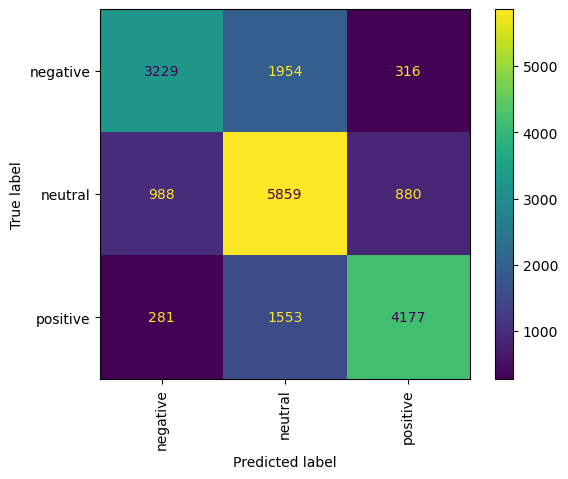

In [132]:
#bigramas
se_.mostrar_tabla(df_to_train,Y)
se_.print_cv_results()

In [140]:
mod_coe = coeficientes_modelo(columnas_finales, se_)

In [21]:
def correlaciones_fuertes(df, lim_inf = 0.3, lim_sup = 1,drop_dupli=True):
    #Calcula la matriz de correlación
    c = df.corr().abs()
    #Lo pasa todo a filas
    c= c.unstack()
    #Pasa el índice a columnas y le pone nombres
    c = pd.DataFrame(c).reset_index()
    c.columns = ['var1','var2','corr']
    #A dataframe, filtra limites y ordena en descendiente
    c = c.loc[(c['corr'] > lim_inf) &  (c['corr'] < lim_sup),:].sort_values(by = 'corr', ascending=False)
    #Desduplica las correlaciones (o no si drop_dupli es False)
    c = c if drop_dupli == False else c.drop_duplicates(subset = ['corr'])
    #Devuelve la salida
    return(c)

In [142]:
correlaciones_fuertes(df_to_train,lim_inf = 0.2)

,var1,var2,corr
94108,mother day,mother,0.882792
93490,happy mother,mother,0.791624
16989,forward,looking forward,0.784720
94778,cant wait,wait,0.715885
94238,mother day,happy mother,0.712305
46343,happy,happy mother,0.601586
17916,looking,looking forward,0.543624
53297,mother,happy,0.515943
46345,happy,mother day,0.451485
16743,forward,looking,0.441761


In [143]:
mod_coe.loc[new]

,coef_nega,coef_neutral,coef_pos,abs_coef_nega,abs_coef_neutral,abs_coef_pos,rank_coef_nega,rank_coef_neutral,rank_coef_pos
palabras,,,,,,,,,
wanna,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,308,308,308
starwar,-0.215970,-0.854883,1.070853,0.215970,0.854883,1.070853,240,37,60
startrek,-1.368219,0.043393,1.324825,1.368219,0.043393,1.324825,60,282,49
gotta,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,308,308,308
happymotherday,-0.069171,-0.336425,0.405596,0.069171,0.336425,0.405596,286,139,184


In [54]:
mod_coe.loc[new].sort_values(by="rank_coef_neutral")

,coef_nega,coef_neutral,coef_pos,abs_coef_nega,abs_coef_neutral,abs_coef_pos,rank_coef_nega,rank_coef_neutral,rank_coef_pos
palabras,,,,,,,,,
very,0.241569,-1.024177,0.782608,0.241569,1.024177,0.782608,230,19,82
ever,0.340332,-0.951173,0.610841,0.340332,0.951173,0.610841,191,24,117
such,0.314213,-0.817396,0.503183,0.314213,0.817396,0.503183,201,42,145
being,0.752753,-0.786507,0.033753,0.752753,0.786507,0.033753,95,47,298
really,0.241849,-0.733283,0.491434,0.241849,0.733283,0.491434,229,52,150
her,0.319496,-0.673787,0.354290,0.319496,0.673787,0.354290,198,66,199
but,0.111642,0.634847,-0.746488,0.111642,0.634847,0.746488,270,74,92
too,0.365021,-0.544519,0.179498,0.365021,0.544519,0.179498,183,91,255
like,-0.004470,-0.532124,0.536594,0.004470,0.532124,0.536594,305,93,132


In [55]:
mod_coe.loc[new].sort_values(by="rank_coef_neutral").index

Index(['very', 'ever', 'such', 'being', 'really', 'her', 'but', 'too', 'like',
       'my', 'or', 'until', 'only', 'around', 'did', 'other', 'same', 'guess'],
      dtype='object', name='palabras')

In [58]:
mod_coe.sort_values(by="coef_neutral",ascending=False)

,coef_nega,coef_neutral,coef_pos,abs_coef_nega,abs_coef_neutral,abs_coef_pos,rank_coef_nega,rank_coef_neutral,rank_coef_pos
palabras,,,,,,,,,
but,0.111642,0.634847,-0.746488,0.111642,0.634847,0.746488,270,74,92
ah,0.173504,0.489076,-0.662580,0.173504,0.489076,0.662580,252,98,104
hair,0.116011,0.443192,-0.559203,0.116011,0.443192,0.559203,268,106,126
online,0.218749,0.423141,-0.641889,0.218749,0.423141,0.641889,240,109,109
playing,-0.246834,0.413278,-0.166444,0.246834,0.413278,0.166444,227,112,261
...,...,...,...,...,...,...,...,...,...
cry,1.894400,-1.318145,-0.576255,1.894400,1.318145,0.576255,29,5,123
fun,-0.983591,-1.326350,2.309940,0.983591,1.326350,2.309940,76,4,26
funny,-1.004218,-1.382383,2.386601,1.004218,1.382383,2.386601,74,3,23


# ITERACION 2: CONVERTIR EMOTICONOS
LO INTENTE MAL EN UN PASO ANTERIOR.  

RESULTADO:    
TENGO UN PEOR RESULTADO  
0.675 -> 0.674

In [ ]:
def cambio_contracciones(tweet):
    
    re_repl = {
     r"\br\b": "are",
     r"\bu\b": "you",
     r"\bhaha\b": "ha",
     r"\bhahaha\b": "ha",
     r"\bdon`t\b": "do not",
     r"\bdoesn`t\b": "does not",
     r"\bdidn`t\b": "did not",
     r"\bhasn`t\b": "has not",
     r"\bhaven`t\b": "have not",
     r"\bhadn`t\b": "had not",
     r"\bwon`t\b": "wont",
     r"\bwouldn`t\b": "would not",
     r"\bcan`t\b": "cant",
     r"\bcan` t\b": "cant",
     r"\bcannot\b": "cant",
     r"\bI`m\b": "Im",
     r"\bI` m\b": "Im",
     r"\bI am\b": "Im", 
     r"\bUGHHH*\b": "ugh", 
     r"\b[Uu]gh*\b": "ugh",
     r"\bI` ve\b": "I have",  
     r"\b[Ii]` s\b": "it is ",
     r"\b[Ii]`s\b": "it is ",
     r"\bborin\b": "boring",  
     r"\bple+a+se\b": "please",  
     r"in`": "ing",  
     r"\bso+\b": "so", 
     r"\bso+w+y+\b": "sorry", 
     r"\b\#\w*\b": "hastag",
     r"[Yy]outube":" socialnetwork ",
     r"myspace":" socialnetwork ",
     r"twitpic":" socialnetwork ",
     r"latalkradio":" socialnetwork ",
     r"[Tt]witter":" socialnetwork ",
     r"[Tt]witch":" socialnetwork ",
     r"\b: -\\/\b":"emosad",
      "#\\w*":"topico",
     r"\bstar wars\b":" starwar ", 
     r"\bstar war\b":" starwar ", 
     r"\bstar trek\b":" startrek ",  
     r"\bstar treck\b":" startrek ",
     # r"\bhappy mother day\b":" happymotherday ",  
     r"\bwan na\b": " wanna ",
     r"\bgot ta\b":" gotta ",   
     r"\b` ve\b": " have "}
    for r, repl in re_repl.items():
     tweet = re.sub(r, repl, tweet)
    return tweet


def f_replace(text):
    
    text = text.replace("****","fuck")
    return text
    

def conteo_ptos_suspensivos(ss):
    return len(re.findall("...",ss.lower() ))
def conteo_exclamaciones(ss):
    return len(re.findall("!",ss.lower() ))

def conteo_poor(ss):
    return len(re.findall("poo+r",ss.lower() ))

def conteo_palabras(ss):
    return len(ss.split())



def conteo_mentions(ss):
    return len(re.findall(r'@\w+',ss.lower() ))

def conteo_hashtags(ss):
    return len(re.findall(r'#\w+',ss.lower() ))

def conteo_capital_words(ss):
    return len(re.findall(r'\b[A-Z]{2,}\b',ss.lower() ))

def conteo_digits(ss):
    return len(re.findall(r'\d+',ss.lower() ))


def count_regex( pattern, tweet):
        return len(re.findall(pattern, tweet))
def cambio_contracciones_good(text):
    emo_repl = {
         # positive emoticons
         " &lt;3 ": " emotigood ",
         " :d ": " emotigood ", # :D in lower case
         " :dd ": " emotigood ", # :DD in lower case
         " 8\\) ": " emotigood ",
         " :-\\) ": " emotigood ",
         " :\\) ": " emotigood ",
         " ;\\) ": " emotigood ",
         " \\(-: ": " emotigood ",
         " \\(: ": " emotigood ",
         " x[dD] ": " emotigood ",
    }
         
    emo_repl_order =  [k for (k_len,k) in reversed(sorted([(len(k),k) for k in emo_repl.keys()]))]
    for k in emo_repl_order:
        # text = re.sub().replace(k, emo_repl[k])
        text = re.sub(k,  emo_repl[k], text)
    return text

def cambio_contracciones_bad(text):
    emo_repl = {
      
         # negative emoticons:
         " :/ ": " emotibad ",
         " :&gt; ": " emotibad ",
         " :'\\)": " emotibad ",
         " :-\\( ": " emotibad ",
         " :\\( ": " emotibad ",
         " [Tt]_[Tt] ":" emotibad ",
         " :S " : " emotibad ",
         " :-S ": " emotibad ",
     }
    emo_repl_order =  [k for (k_len,k) in reversed(sorted([(len(k),k) for k in emo_repl.keys()]))]
    for k in emo_repl_order:
        # text = text.replace(k, emo_repl[k])
        text = re.sub(k,  emo_repl[k], text)
    return text


### VARIABLES
#######################################################################
variables_tfidf_aux = var_final_s6.copy()
# new=["wanna","starwar","startrek","gotta" ] 
new=["emotibad","emotigood" ] 
old_new = ['very', 'ever', 'such', 'being', 'really', 'her', 'but', 'too', 'like',  'my', 'or', 'until', 'only', 'around']\
+["wanna","starwar","startrek" ] 
variables_tfidf_aux2 = variables_tfidf_aux + old_new+ new
terminos_inutiles =   ["wan","na","got","ta"]
variables_tfidf = [w for w in variables_tfidf_aux2 if w not in terminos_inutiles]

terminos_inutiles=[]

#PARAMETROS
#######################################
lista_palabras = ["not","best","big",'good', 'goods', 'got', 'great',
                 "new",'nobody','number','possible','small',"kind",'well', "going","but","find","so","much"]
stopwords2 = [word for word in stopwords if word not in lista_palabras]
# stopwords2.extend(['this', 'else', 'then', 're'])

params_model={"max_iter":2000}

params_Tfidf = {"ngram_range":(1, 1),
                         "min_df":4,
                         "max_df":0.5,   
                         "smooth_idf": True,
                         "use_idf":True ,
                         "lowercase":True,
                        # "max_features":300 #,
                        "vocabulary":variables_tfidf
               }

lista_funciones = [("conteo_exclamaciones",conteo_exclamaciones),
                   #("conteo_palabras",conteo_palabras),
                   #("conteo_poor",conteo_poor),
                   # ("conteo_mentions",conteo_mentions),
                   # ("conteo_hashtags",conteo_hashtags),
                   # ("conteo_capital_words",conteo_capital_words),
                   #("conteo_digits",conteo_digits),
                   ("conteo_ptos_suspensivos",conteo_ptos_suspensivos) ]



#MODELO
#######################################

preprocesador = Preprocesador_datos(X,"text",stopwords2)
preprocesador._add_fc(cambio_contracciones)
preprocesador._add_fc(cambio_contracciones_bad)
preprocesador._add_fc(cambio_contracciones_good)
preprocesador._add_fc(f_replace)


preprocesador.fit()
df_texto = preprocesador.datos_procesado


sv_ = Sentiment_Vectorizer(params_Tfidf )
x___ = sv_.fit_transform_vectorizer(preprocesador.datos_procesado)

voc_2gram = ["getting hungry","too big","looking forward","cant wait"  ]
params_Tfidf_2 = {"ngram_range":(2, 2), 
                         "max_df":0.5,   
                         "smooth_idf": True,
                         "use_idf":True ,
                         "lowercase":True,
                         "max_features":20,
                  "vocabulary": voc_2gram
               }
sv_2 = Sentiment_Vectorizer(params_Tfidf_2 )
x___2 = sv_2.fit_transform_vectorizer(preprocesador.datos_procesado)

# df_emogood = X["text"].apply(lambda x: cambio_contracciones_good( x)).apply(lambda x: count_regex( "emotigood", x) )
# df_emogood.name = "emotigood"
# df_emobad = X["text"].apply(lambda x: cambio_contracciones( x)).apply(lambda x: count_regex( "emotibad", x) )
# df_emobad.name = "emotibad"
# df_emo = pd.concat([df_emogood,df_emobad],axis=1)


se_ = Sentiment_Evaluator(model = LogisticRegression,params_model=params_model)


if len(lista_funciones)>0:
    
    nfp = New_features_pruebas(X["text"], lista_funciones)
    df_new_features = nfp.obtener_variables()
    df_to_train = pd.concat([x___,x___2, df_new_features.reset_index()],axis=1).set_index("textID")
    columnas_finales = df_to_train.columns.tolist()
else:
    columnas_finales = x___.columns
    df_to_train = x___.copy()

N4_set = set(x___.columns.tolist())

#ENTRANAMIENTO
se_.fit(df_to_train,Y)

#RESULTADOS
se_.mostrar_tabla(df_to_train,Y)
se_.print_cv_results()

In [189]:
mod_coe = coeficientes_modelo(columnas_finales, se_)
mod_coe.loc[new]

,coef_nega,coef_neutral,coef_pos,abs_coef_nega,abs_coef_neutral,abs_coef_pos,rank_coef_nega,rank_coef_neutral,rank_coef_pos
palabras,,,,,,,,,
emotibad,0.537673,0.145456,-0.683129,0.537673,0.145456,0.683129,130,225,99
emotigood,-0.318324,-0.446924,0.765248,0.318324,0.446924,0.765248,195,107,84


In [192]:
mod_coe.loc[["conteo_digits"]]

,coef_nega,coef_neutral,coef_pos,abs_coef_nega,abs_coef_neutral,abs_coef_pos,rank_coef_nega,rank_coef_neutral,rank_coef_pos
palabras,,,,,,,,,
conteo_digits,-0.029868,0.050753,-0.020885,0.029868,0.050753,0.020885,291,278,301


In [193]:
correlaciones_fuertes(df_to_train)

,var1,var2,corr
16880,forward,looking forward,0.784482
69071,wait,cant wait,0.716094
17801,looking,looking forward,0.543457
45915,happy,mother,0.517908
16635,forward,looking,0.441762
36091,day,mother,0.393309
15653,cant,cant wait,0.316876
29470,weburl,conteo_digits,0.302222


C:\Program Files\Anaconda3\envs\ML\Lib\site-packages\sklearn\utils\validation.py:787: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Program Files\Anaconda3\envs\ML\Lib\site-packages\sklearn\utils\validation.py:787: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Program Files\Anaconda3\envs\ML\Lib\site-packages\sklearn\utils\validation.py:787: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


              precision    recall  f1-score   support

    negative       0.72      0.59      0.65      5499
     neutral       0.63      0.76      0.68      7727
    positive       0.78      0.70      0.73      6011

    accuracy                           0.69     19237
   macro avg       0.71      0.68      0.69     19237
weighted avg       0.70      0.69      0.69     19237

RESULTADOS
---------------------
Metrica f1_macro 
media: 0.674
std:0.008
min:0.662
max:0.688


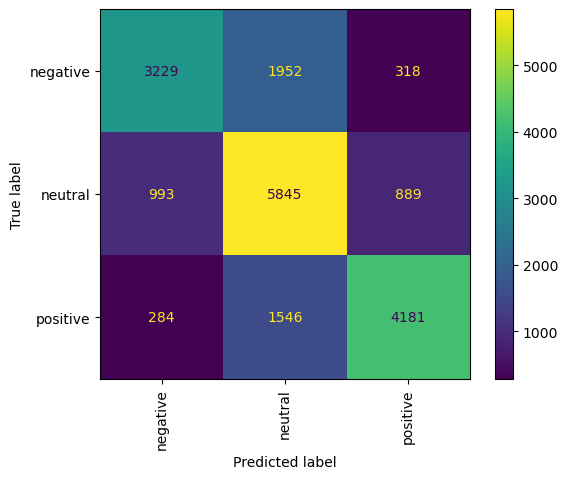

In [165]:
se_.mostrar_tabla(df_to_train,Y)
se_.print_cv_results()

# ITERACION 3: VERB+ING -> VERB CON STEMMER
voy a utilizar un stemmer. el lemanizador que estaba utilizando no funcionaba con verbos mas que nada con plural y asi

RESULTADO 
parece que nos da un buen resultado
6.75 ->0.681


In [5]:
from nltk.stem import PorterStemmer

In [196]:
porter = PorterStemmer()
porter.stem("watching")


'watch'

In [11]:
class Preprocesador_datos2:
    def __init__(self,data,variable, stopwords):
        
        self.df_input = data[variable]
        self.output =  None
        self.nombre_final = 'texto'
        self.lista_fcs = [self.feature_weburl]
        self.stopwords = stopwords
        
    def feature_weburl(self,texto:str):
        s = texto.lower().strip()
        ss = re.sub(r"(http|https)\:\/\/\w*\.\w*(\.\w*|\/\w*|~\w*)*(|\/[~\w\d]*|\.w*)", "weburl", s)
        return ss
        
        
    def preproceso_texto(self,texto:str):
            s = texto.lower().strip()
            porter = PorterStemmer()
            tokens = nltk.tokenize.word_tokenize(s)
      
            tokens = [wordnet_lemmatizer.lemmatize(t) for t in tokens]
            tokens = [porter.stem(word) for word in tokens]
            # tokens = [t for t in tokens if t not in self.stopwords]
            # tokens = [t for t in tokens if not any(c.isdigit() for c in t)]
            return ' '.join(tokens)

    def _add_fc(self,fcs):
        self.lista_fcs.append(fcs)

    def fit(self):
        X = self.df_input.copy()
        self._add_fc(self.preproceso_texto)
        for fc in  self.lista_fcs:
            X = self.apply_fc(X,fc)
        self.output = X
        
    def apply_fc(self, data, fc):
        return data.apply(lambda x: fc(x))
        
    @property
    def datos_procesado(self):
        aux =  pd.DataFrame(self.output)
        aux.columns = [self.nombre_final]
        return aux

C:\Program Files\Anaconda3\envs\ML\Lib\site-packages\sklearn\utils\validation.py:787: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Program Files\Anaconda3\envs\ML\Lib\site-packages\sklearn\utils\validation.py:787: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Program Files\Anaconda3\envs\ML\Lib\site-packages\sklearn\utils\validation.py:787: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Program Files\Anaconda3\envs\ML\Lib\site-packages\sklearn\utils\validation.py:787: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Program Files\Anaconda3\envs\ML\Lib\site-packages\sklearn\utils\validation.py:787: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy arra

              precision    recall  f1-score   support

    negative       0.73      0.59      0.65      5499
     neutral       0.63      0.76      0.69      7727
    positive       0.78      0.71      0.74      6011

    accuracy                           0.70     19237
   macro avg       0.71      0.69      0.70     19237
weighted avg       0.71      0.70      0.70     19237

RESULTADOS
---------------------
Metrica f1_macro 
media: 0.681
std:0.007
min:0.668
max:0.691


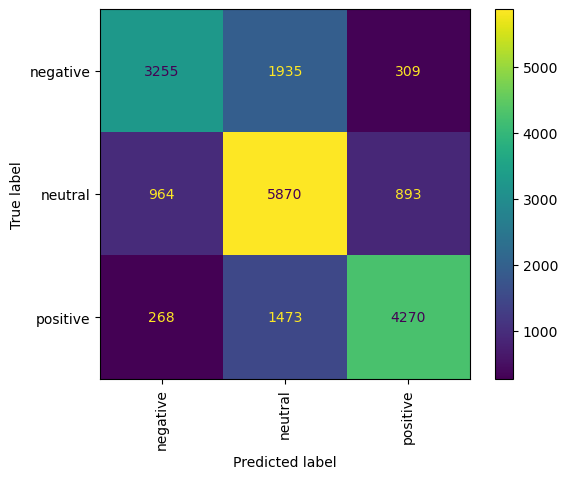

In [28]:
def cambio_contracciones(tweet):
    
    re_repl = {
     r"\br\b": "are",
     r"\bu\b": "you",
     r"\bhaha\b": "ha",
     r"\bhahaha\b": "ha",
     r"\bdon`t\b": "do not",
     r"\bdoesn`t\b": "does not",
     r"\bdidn`t\b": "did not",
     r"\bhasn`t\b": "has not",
     r"\bhaven`t\b": "have not",
     r"\bhadn`t\b": "had not",
     r"\bwon`t\b": "wont",
     r"\bwouldn`t\b": "would not",
     r"\bcan`t\b": "cant",
     r"\bcan` t\b": "cant",
     r"\bcannot\b": "cant",
     r"\bI`m\b": "Im",
     r"\bI` m\b": "Im",
     r"\bI am\b": "Im", 
     r"\bUGHHH*\b": "ugh", 
     r"\b[Uu]gh*\b": "ugh",
     r"\bI` ve\b": "I have",  
     r"\b[Ii]` s\b": "it is ",
     r"\b[Ii]`s\b": "it is ",
     r"\bborin\b": "boring",  
     r"\bple+a+se\b": "please",  
     r"in`": "ing",  
     r"\bso+\b": "so", 
     r"\bso+w+y+\b": "sorry", 
     r"\b\#\w*\b": "hastag",
     r"[Yy]outube":" socialnetwork ",
     r"myspace":" socialnetwork ",
     r"twitpic":" socialnetwork ",
     r"latalkradio":" socialnetwork ",
     r"[Tt]witter":" socialnetwork ",
     r"[Tt]witch":" socialnetwork ",
     r"\b: -\\/\b":"emosad",
      "#\\w*":"topico",
     r"\bstar wars\b":" starwar ", 
     r"\bstar war\b":" starwar ", 
     r"\bstar trek\b":" startrek ",  
     r"\bstar treck\b":" startrek ",
     # r"\bhappy mother day\b":" happymotherday ",  
     r"\bwan na\b": " wanna ",
     r"\bgot ta\b":" gotta ",   
     r"\b` ve\b": " have "}
    for r, repl in re_repl.items():
     tweet = re.sub(r, repl, tweet)
    return tweet


def f_replace(text):
    
    text = text.replace("****","fuck")
    return text
    

def conteo_ptos_suspensivos(ss):
    return len(re.findall("...",ss.lower() ))
def conteo_exclamaciones(ss):
    return len(re.findall("!",ss.lower() ))

def conteo_poor(ss):
    return len(re.findall("poo+r",ss.lower() ))

def conteo_palabras(ss):
    return len(ss.split())



def conteo_mentions(ss):
    return len(re.findall(r'@\w+',ss.lower() ))

def conteo_hashtags(ss):
    return len(re.findall(r'#\w+',ss.lower() ))

def conteo_capital_words(ss):
    return len(re.findall(r'\b[A-Z]{2,}\b',ss.lower() ))

def conteo_digits(ss):
    return len(re.findall(r'\d+',ss.lower() ))


def count_regex( pattern, tweet):
        return len(re.findall(pattern, tweet))
def cambio_contracciones_good(text):
    emo_repl = {
         # positive emoticons
         " &lt;3 ": " emotigood ",
         " :d ": " emotigood ", # :D in lower case
         " :dd ": " emotigood ", # :DD in lower case
         " 8\\) ": " emotigood ",
         " :-\\) ": " emotigood ",
         " :\\) ": " emotigood ",
         " ;\\) ": " emotigood ",
         " \\(-: ": " emotigood ",
         " \\(: ": " emotigood ",
         " x[dD] ": " emotigood ",
    }
         
    emo_repl_order =  [k for (k_len,k) in reversed(sorted([(len(k),k) for k in emo_repl.keys()]))]
    for k in emo_repl_order:
        # text = re.sub().replace(k, emo_repl[k])
        text = re.sub(k,  emo_repl[k], text)
    return text

def cambio_contracciones_bad(text):
    emo_repl = {
      
         # negative emoticons:
         " :/ ": " emotibad ",
         " :&gt; ": " emotibad ",
         " :'\\)": " emotibad ",
         " :-\\( ": " emotibad ",
         " :\\( ": " emotibad ",
         " [Tt]_[Tt] ":" emotibad ",
         " :S " : " emotibad ",
         " :-S ": " emotibad ",
     }
    emo_repl_order =  [k for (k_len,k) in reversed(sorted([(len(k),k) for k in emo_repl.keys()]))]
    for k in emo_repl_order:
        # text = text.replace(k, emo_repl[k])
        text = re.sub(k,  emo_repl[k], text)
    return text


### VARIABLES
#######################################################################
variables_tfidf_aux = var_final_s6.copy()
# new=["wanna","starwar","startrek","gotta" ] 
new=[ "other","no","better","away","off","them","would","man","your","final" ] 

old_new = ['very', 'ever', 'such', 'being', 'really', 'her', 'but', 'too', 'like',  'my', 'or', 'until', 'only', 'around']\
+["wanna","starwar","startrek" ,"emotibad","emotigood" ] 
variables_tfidf_aux2 = variables_tfidf_aux + old_new+ new
terminos_inutiles =   ["wan","na","got","ta"]
porter = PorterStemmer()

variables_tfidf = [porter.stem(w) for w in variables_tfidf_aux2 if w not in terminos_inutiles]

variables_tfidf = list(set(variables_tfidf))
#PARAMETROS
#######################################
lista_palabras = ["not","best","big",'good', 'goods', 'got', 'great',
                 "new",'nobody','number','possible','small',"kind",'well', "going","but","find","so","much"]
stopwords2 = [word for word in stopwords if word not in lista_palabras]
# stopwords2.extend(['this', 'else', 'then', 're'])

params_model={"max_iter":2000}

params_Tfidf = {"ngram_range":(1, 1),
                         "min_df":4,
                         "max_df":0.5,   
                         "smooth_idf": True,
                         "use_idf":True ,
                         "lowercase":True,
                         # "max_features":300 #,
                        "vocabulary":variables_tfidf
               }

lista_funciones = [("conteo_exclamaciones",conteo_exclamaciones),
                   #("conteo_palabras",conteo_palabras),
                   #("conteo_poor",conteo_poor),
                   # ("conteo_mentions",conteo_mentions),
                   # ("conteo_hashtags",conteo_hashtags),
                   # ("conteo_capital_words",conteo_capital_words),
                   #("conteo_digits",conteo_digits),
                   ("conteo_ptos_suspensivos",conteo_ptos_suspensivos) ]



#MODELO
#######################################

preprocesador = Preprocesador_datos2(X,"text",stopwords2)
preprocesador._add_fc(cambio_contracciones)
preprocesador._add_fc(cambio_contracciones_bad)
preprocesador._add_fc(cambio_contracciones_good)
preprocesador._add_fc(f_replace)


preprocesador.fit()
df_texto = preprocesador.datos_procesado


sv_ = Sentiment_Vectorizer(params_Tfidf )
x___ = sv_.fit_transform_vectorizer(preprocesador.datos_procesado)

voc_2gram = ["getting hungry","too big","looking forward","cant wait"  ]
params_Tfidf_2 = {"ngram_range":(2, 2), 
                         "max_df":0.5,   
                         "smooth_idf": True,
                         "use_idf":True ,
                         "lowercase":True,
                         "max_features":20,
                  "vocabulary": voc_2gram
               }
sv_2 = Sentiment_Vectorizer(params_Tfidf_2 )
x___2 = sv_2.fit_transform_vectorizer(preprocesador.datos_procesado)



se_ = Sentiment_Evaluator(model = LogisticRegression,params_model=params_model)


if len(lista_funciones)>0:
    
    nfp = New_features_pruebas(X["text"], lista_funciones)
    df_new_features = nfp.obtener_variables()
    df_to_train = pd.concat([x___,x___2, df_new_features.reset_index()],axis=1).set_index("textID")
    columnas_finales = df_to_train.columns.tolist()
else:
    columnas_finales = x___.columns
    df_to_train = x___.copy()

N4_set = set(x___.columns.tolist())

#ENTRANAMIENTO
se_.fit(df_to_train,Y)

#RESULTADOS
se_.mostrar_tabla(df_to_train,Y)
se_.print_cv_results()

In [218]:
def columns_analysis(viejo,nuevo):
    if isinstance(viejo,list):
        set_viejo = set(viejo)
    if isinstance(nuevo,list):
        set_nuevo = set(nuevo)
        
    string = "Numero de elementos"
    print(f"{string}  set_viejo {len(set_viejo)}")
    print(f"{string} set_nuevo {len(set_nuevo)}")
    print("")
    
    print("Elementos que existen en viejo y no en nuevo:")
    viejo_menos_nuevo = set_viejo.difference(set_nuevo)
    print(viejo_menos_nuevo)
    print(" "*30)
    print("Elementos que existen en nuevo y no en viejo:")
    nuevo_menos_viejo = set_nuevo.difference(set_viejo)
    print(nuevo_menos_viejo )  
    return list(viejo_menos_nuevo), list(nuevo_menos_viejo)

In [219]:
viejo_menos_nuevo,nuevo_menos_viejo = columns_analysis(variables_tfidf,columnas_finales)

Numero de elementos  set_viejo 300
Numero de elementos set_nuevo 306

Elementos que existen en viejo y no en nuevo:
{'boy', 'wasn', 'summer', 'mum', 'computer', 'seeing', 'coming', 'dinner', 'ah', 'starwar', 'amazing', 'hug', 'crazy', 'saturday', 'baby', 'star', 'playing', 'music', 'tough', 'didnt', 'emotigood', 'seen', 'lost', 'sucked', 'very', 'happy', 'anymore', 'hello', 'welcome', 'site', 'dream', 'really', 'outside', '30', 'gutted', 'missed', 'eye', 'tho', 'taking', 'super', 'kinda', 'break', 'maybe', 'okay', 'lovely', 'name', 'exam', 'eating', 'getting', 'brother', 'follower', 'month', 'drink', 'depressing', 'headache', 'hit', 'dreary', 'plan', 'cause', 'boo', 'starting', 'cute', 'luck', 'honest', 'le', 'following', 'ago', 'waiting', 'word', 'office', 'talking', 'being', 'rainy', 'rest', 'war', 'crappy', 'tried', 'lmao', 'awww', 'beautiful', 'class', 'thats', 'shopping', 'trek', 'picture', 'own', 'dude', 'post', 'excited', 'photo', 'fair', 'boring', 'wonderful', '10', 'called', '

In [ ]:
mod_coe_new = coeficientes_modelo(columnas_finales, se_)

mod_coe_new.loc[new]

correlaciones_fuertes(df_to_train)

# ITERACCION 4: tag variables
usando analisis semantico de una funcion de nltk vamos a probar si añadir informacion semantica al modelo mejora la clasificacion.

Funciona pero hay que normalizar la informacion semantica 

RESULTADO  
0.681 -> 0.683

In [61]:
class tag_class:
    def __init__(self, variables):
        self.variables = variables 
        
        
    def get_tag(self, text):
        return ' '.join([tag for word,  tag in nltk.pos_tag(nltk.word_tokenize(text))])
    
    def count_regex(self, pattern, tweet):
        return len(re.findall(pattern, tweet))

    def tag_proccess_var(self,var,data):
        """ X : series"""
        X.apply(lambda x : self.count_regex( var, data) )

    def tag_proccess_df(self,X):
        X_tag = X.apply(  lambda x : get_tag(x))
        
        self.output_list = []
        for var in self.variables:
            output = X_tag.apply(lambda x: self.count_regex(var,x))
            output.name = var
            self.output_list.append(output)
        return pd.concat(self.output_list,axis=1)
      
    

In [ ]:
tags = ['CC','CD',
 'DT','EX','FW','IN','JJ',
 'JJR','JJS','LS','MD',
 'NN','NNP','NNPS','NNS','PDT',
 'POS','PRP','RB','RBR','RBS',
 'RP','SYM','TO','UH','VB','VBD',
 'VBG','VBN','VBP','VBZ','WDT','WP','WRB']

tag_instance = tag_class(tags)


X_tag = tag_instance.tag_proccess_df(X["text"])

In [42]:
# X

In [47]:
def get_tag( text):
        return ' '.join([tag for word,  tag in nltk.pos_tag(nltk.word_tokenize(text))])

In [51]:
def count_regex(pattern, tweet):
        return len(re.findall(pattern, tweet))

In [49]:
X_tag = X["text"].apply(  lambda x : get_tag(x))

In [ ]:
class Preprocesador_datos2:
    def __init__(self,data,variable, stopwords):
        
        self.df_input = data[variable]
        self.output =  None
        self.nombre_final = 'texto'
        self.lista_fcs = [self.feature_weburl]
        self.stopwords = stopwords
        
    def feature_weburl(self,texto:str):
        s = texto.lower().strip()
        ss = re.sub(r"(http|https)\:\/\/\w*\.\w*(\.\w*|\/\w*|~\w*)*(|\/[~\w\d]*|\.w*)", "weburl", s)
        return ss
        
        
    def preproceso_texto(self,texto:str):
            s = texto.lower().strip()
            porter = PorterStemmer()
            tokens = nltk.tokenize.word_tokenize(s)
      
            tokens = [wordnet_lemmatizer.lemmatize(t) for t in tokens]
            tokens = [porter.stem(word) for word in tokens]
            # tokens = [t for t in tokens if t not in self.stopwords]
            # tokens = [t for t in tokens if not any(c.isdigit() for c in t)]
            return ' '.join(tokens)

    def _add_fc(self,fcs):
        self.lista_fcs.append(fcs)

    def fit(self):
        X = self.df_input.copy()
        self._add_fc(self.preproceso_texto)
        for fc in  self.lista_fcs:
            X = self.apply_fc(X,fc)
        self.output = X
        
    def apply_fc(self, data, fc):
        return data.apply(lambda x: fc(x))
        
    @property
    def datos_procesado(self):
        aux =  pd.DataFrame(self.output)
        aux.columns = [self.nombre_final]
        return aux

In [103]:
def normalizar(X):
    suma = X.sum()
    return X/suma
X_tag_.apply(lambda x: normalizar(x),axis=1).fillna(0)

,CC,CD,DT,EX,FW,IN,JJ,JJR,JJS,LS,...,UH,VB,VBD,VBG,VBN,VBP,VBZ,WDT,WP,WRB
textID,,,,,,,,,,,,,,,,,,,,,
549e992a42,0.000000,0.00,0.000000,0.0,0.0,0.062500,0.000000,0.0,0.000000,0.0,...,0.0,0.062500,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00
9642c003ef,0.000000,0.00,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.166667,0.00
28b57f3990,0.000000,0.00,0.117647,0.0,0.0,0.117647,0.058824,0.0,0.058824,0.0,...,0.0,0.117647,0.000000,0.058824,0.000000,0.058824,0.000000,0.0,0.000000,0.00
6e0c6d75b1,0.050000,0.05,0.100000,0.0,0.0,0.050000,0.000000,0.0,0.000000,0.0,...,0.0,0.100000,0.000000,0.000000,0.000000,0.050000,0.050000,0.0,0.000000,0.05
e050245fbd,0.000000,0.00,0.250000,0.0,0.0,0.250000,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4eac33d1c0,0.045455,0.00,0.000000,0.0,0.0,0.045455,0.045455,0.0,0.000000,0.0,...,0.0,0.181818,0.045455,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00
4f4c4fc327,0.000000,0.00,0.064516,0.0,0.0,0.000000,0.161290,0.0,0.000000,0.0,...,0.0,0.129032,0.000000,0.000000,0.064516,0.000000,0.032258,0.0,0.000000,0.00
f67aae2310,0.000000,0.00,0.080000,0.0,0.0,0.120000,0.120000,0.0,0.000000,0.0,...,0.0,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00


C:\Program Files\Anaconda3\envs\ML\Lib\site-packages\sklearn\utils\validation.py:787: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Program Files\Anaconda3\envs\ML\Lib\site-packages\sklearn\utils\validation.py:787: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Program Files\Anaconda3\envs\ML\Lib\site-packages\sklearn\utils\validation.py:787: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Program Files\Anaconda3\envs\ML\Lib\site-packages\sklearn\utils\validation.py:787: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Program Files\Anaconda3\envs\ML\Lib\site-packages\sklearn\utils\validation.py:787: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy arra

              precision    recall  f1-score   support

    negative       0.73      0.60      0.66      5499
     neutral       0.64      0.76      0.69      7727
    positive       0.78      0.71      0.74      6011

    accuracy                           0.70     19237
   macro avg       0.71      0.69      0.70     19237
weighted avg       0.71      0.70      0.70     19237

RESULTADOS
---------------------
Metrica f1_macro 
media: 0.683
std:0.008
min:0.673
max:0.696


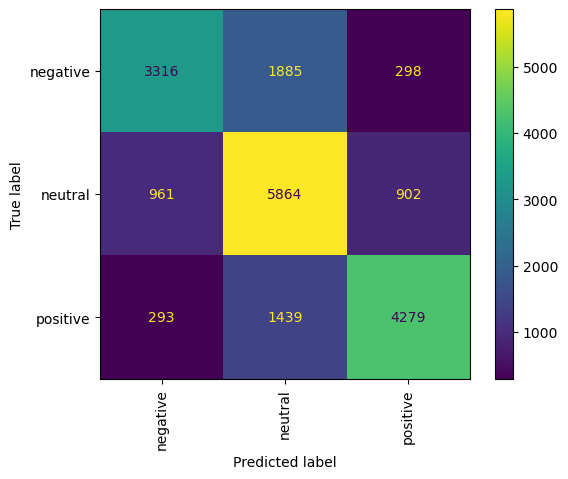

In [104]:
def cambio_contracciones(tweet):
    
    re_repl = {
     r"\br\b": "are",
     r"\bu\b": "you",
     r"\bhaha\b": "ha",
     r"\bhahaha\b": "ha",
     r"\bdon`t\b": "do not",
     r"\bdoesn`t\b": "does not",
     r"\bdidn`t\b": "did not",
     r"\bhasn`t\b": "has not",
     r"\bhaven`t\b": "have not",
     r"\bhadn`t\b": "had not",
     r"\bwon`t\b": "wont",
     r"\bwouldn`t\b": "would not",
     r"\bcan`t\b": "cant",
     r"\bcan` t\b": "cant",
     r"\bcannot\b": "cant",
     r"\bI`m\b": "Im",
     r"\bI` m\b": "Im",
     r"\bI am\b": "Im", 
     r"\bUGHHH*\b": "ugh", 
     r"\b[Uu]gh*\b": "ugh",
     r"\bI` ve\b": "I have",  
     r"\b[Ii]` s\b": "it is ",
     r"\b[Ii]`s\b": "it is ",
     r"\bborin\b": "boring",  
     r"\bple+a+se\b": "please",  
     r"in`": "ing",  
     r"\bso+\b": "so", 
     r"\bso+w+y+\b": "sorry", 
     r"\b\#\w*\b": "hastag",
     r"[Yy]outube":" socialnetwork ",
     r"myspace":" socialnetwork ",
     r"twitpic":" socialnetwork ",
     r"latalkradio":" socialnetwork ",
     r"[Tt]witter":" socialnetwork ",
     r"[Tt]witch":" socialnetwork ",
     r"\b: -\\/\b":"emosad",
      "#\\w*":"topico",
     r"\bstar wars\b":" starwar ", 
     r"\bstar war\b":" starwar ", 
     r"\bstar trek\b":" startrek ",  
     r"\bstar treck\b":" startrek ",
     # r"\bhappy mother day\b":" happymotherday ",  
     r"\bwan na\b": " wanna ",
     r"\bgot ta\b":" gotta ",   
     r"\b` ve\b": " have "}
    for r, repl in re_repl.items():
     tweet = re.sub(r, repl, tweet)
    return tweet


def f_replace(text):
    
    text = text.replace("****","fuck")
    return text
    

def conteo_ptos_suspensivos(ss):
    return len(re.findall("...",ss.lower() ))
def conteo_exclamaciones(ss):
    return len(re.findall("!",ss.lower() ))

def conteo_poor(ss):
    return len(re.findall("poo+r",ss.lower() ))

def conteo_palabras(ss):
    return len(ss.split())



def conteo_mentions(ss):
    return len(re.findall(r'@\w+',ss.lower() ))

def conteo_hashtags(ss):
    return len(re.findall(r'#\w+',ss.lower() ))

def conteo_capital_words(ss):
    return len(re.findall(r'\b[A-Z]{2,}\b',ss.lower() ))

def conteo_digits(ss):
    return len(re.findall(r'\d+',ss.lower() ))


def count_regex( pattern, tweet):
        return len(re.findall(pattern, tweet))
def cambio_contracciones_good(text):
    emo_repl = {
         # positive emoticons
         " &lt;3 ": " emotigood ",
         " :d ": " emotigood ", # :D in lower case
         " :dd ": " emotigood ", # :DD in lower case
         " 8\\) ": " emotigood ",
         " :-\\) ": " emotigood ",
         " :\\) ": " emotigood ",
         " ;\\) ": " emotigood ",
         " \\(-: ": " emotigood ",
         " \\(: ": " emotigood ",
         " x[dD] ": " emotigood ",
    }
         
    emo_repl_order =  [k for (k_len,k) in reversed(sorted([(len(k),k) for k in emo_repl.keys()]))]
    for k in emo_repl_order:
        # text = re.sub().replace(k, emo_repl[k])
        text = re.sub(k,  emo_repl[k], text)
    return text

def cambio_contracciones_bad(text):
    emo_repl = {
      
         # negative emoticons:
         " :/ ": " emotibad ",
         " :&gt; ": " emotibad ",
         " :'\\)": " emotibad ",
         " :-\\( ": " emotibad ",
         " :\\( ": " emotibad ",
         " [Tt]_[Tt] ":" emotibad ",
         " :S " : " emotibad ",
         " :-S ": " emotibad ",
     }
    emo_repl_order =  [k for (k_len,k) in reversed(sorted([(len(k),k) for k in emo_repl.keys()]))]
    for k in emo_repl_order:
        # text = text.replace(k, emo_repl[k])
        text = re.sub(k,  emo_repl[k], text)
    return text


### VARIABLES
#######################################################################
variables_tfidf_aux = var_final_s6.copy()
# new=["wanna","starwar","startrek","gotta" ] 
new=[ "other","no","better","away","off","them","would","man","your","final" ] 

old_new = ['very', 'ever', 'such', 'being', 'really', 'her', 'but', 'too', 'like',  'my', 'or', 'until', 'only', 'around']\
+["wanna","starwar","startrek" ,"emotibad","emotigood" ] 
variables_tfidf_aux2 = variables_tfidf_aux + old_new+ new
terminos_inutiles =   ["wan","na","got","ta"]
porter = PorterStemmer()

variables_tfidf = [porter.stem(w) for w in variables_tfidf_aux2 if w not in terminos_inutiles]

variables_tfidf = list(set(variables_tfidf))
#PARAMETROS
#######################################
lista_palabras = ["not","best","big",'good', 'goods', 'got', 'great',
                 "new",'nobody','number','possible','small',"kind",'well', "going","but","find","so","much"]
stopwords2 = [word for word in stopwords if word not in lista_palabras]
# stopwords2.extend(['this', 'else', 'then', 're'])

params_model={"max_iter":2000}

params_Tfidf = {"ngram_range":(1, 1),
                         "min_df":4,
                         "max_df":0.5,   
                         "smooth_idf": True,
                         "use_idf":True ,
                         "lowercase":True,
                         # "max_features":300 #,
                        "vocabulary":variables_tfidf
               }

lista_funciones = [("conteo_exclamaciones",conteo_exclamaciones),
                   #("conteo_palabras",conteo_palabras),
                   #("conteo_poor",conteo_poor),
                   # ("conteo_mentions",conteo_mentions),
                   # ("conteo_hashtags",conteo_hashtags),
                   # ("conteo_capital_words",conteo_capital_words),
                   #("conteo_digits",conteo_digits),
                   ("conteo_ptos_suspensivos",conteo_ptos_suspensivos) ]



#MODELO
#######################################

preprocesador = Preprocesador_datos2(X,"text",stopwords2)
preprocesador._add_fc(cambio_contracciones)
preprocesador._add_fc(cambio_contracciones_bad)
preprocesador._add_fc(cambio_contracciones_good)
preprocesador._add_fc(f_replace)


preprocesador.fit()
df_texto = preprocesador.datos_procesado


sv_ = Sentiment_Vectorizer(params_Tfidf )
x___ = sv_.fit_transform_vectorizer(preprocesador.datos_procesado)

voc_2gram = ["getting hungry","too big","looking forward","cant wait"  ]
params_Tfidf_2 = {"ngram_range":(2, 2), 
                         "max_df":0.5,   
                         "smooth_idf": True,
                         "use_idf":True ,
                         "lowercase":True,
                         "max_features":20,
                  "vocabulary": voc_2gram
               }
sv_2 = Sentiment_Vectorizer(params_Tfidf_2 )
x___2 = sv_2.fit_transform_vectorizer(preprocesador.datos_procesado)

# df_emogood = X["text"].apply(lambda x: cambio_contracciones_good( x)).apply(lambda x: count_regex( "emotigood", x) )
# df_emogood.name = "emotigood"
# df_emobad = X["text"].apply(lambda x: cambio_contracciones( x)).apply(lambda x: count_regex( "emotibad", x) )
# df_emobad.name = "emotibad"
# df_emo = pd.concat([df_emogood,df_emobad],axis=1)


se_ = Sentiment_Evaluator(model = LogisticRegression,params_model=params_model)

tags = ['CC','CD',
 'DT','EX','FW','IN','JJ',
 'JJR','JJS','LS','MD',
 'NN','NNP','NNPS','NNS','PDT',
 'POS','PRP','RB','RBR','RBS',
 'RP','SYM','TO','UH','VB','VBD',
 'VBG','VBN','VBP','VBZ','WDT','WP','WRB']

tag_instance = tag_class(tags)


X_tag_ = tag_instance.tag_proccess_df(X["text"])
X_tag = X_tag_.apply(lambda x: normalizar(x),axis=1).fillna(0)

if len(lista_funciones)>0:
    
    nfp = New_features_pruebas(X["text"], lista_funciones)
    df_new_features = nfp.obtener_variables()
    df_to_train = pd.concat([x___,x___2,X_tag.reset_index()[tags], df_new_features.reset_index()],axis=1).set_index("textID")
    columnas_finales = df_to_train.columns.tolist()
else:
    columnas_finales = x___.columns
    df_to_train = x___.copy()

N4_set = set(x___.columns.tolist())

#ENTRANAMIENTO
se_.fit(df_to_train,Y)

#RESULTADOS
se_.mostrar_tabla(df_to_train,Y)
se_.print_cv_results()

In [105]:
mod_coe_new = coeficientes_modelo(columnas_finales, se_)

In [106]:
mod_coe_new.loc[tags]

,coef_nega,coef_neutral,coef_pos,abs_coef_nega,abs_coef_neutral,abs_coef_pos,rank_coef_nega,rank_coef_neutral,rank_coef_pos
palabras,,,,,,,,,
CC,-0.266393,-0.428228,0.694621,0.266393,0.428228,0.694621,214,118,111
CD,-1.174759,0.925329,0.249430,1.174759,0.925329,0.249430,62,26,236
DT,-0.368426,-0.277209,0.645634,0.368426,0.277209,0.645634,177,174,121
EX,-0.221149,0.901261,-0.680112,0.221149,0.901261,0.680112,238,29,116
FW,0.253744,-0.092257,-0.161487,0.253744,0.092257,0.161487,221,275,267
IN,-0.542229,0.780101,-0.237873,0.542229,0.780101,0.237873,125,48,240
JJ,0.078575,-1.289361,1.210786,0.078575,1.289361,1.210786,296,6,51
JJR,-0.357358,0.604166,-0.246809,0.357358,0.604166,0.246809,178,74,238
JJS,0.409582,-0.476610,0.067027,0.409582,0.476610,0.067027,162,109,302


In [83]:
columnas_finales

['broke',
 'wish',
 'hit',
 'wrong',
 'bad',
 'mum',
 'didnt',
 'emotibad',
 'name',
 're',
 'monday',
 'realli',
 'site',
 'outsid',
 'boo',
 'then',
 'my',
 'doe',
 'angri',
 'movi',
 'week',
 'rest',
 'coffe',
 'heard',
 'hi',
 'babi',
 'around',
 'excit',
 'tonight',
 'total',
 'other',
 'them',
 'sorri',
 'break',
 'famili',
 'enjoy',
 'off',
 'wow',
 'saturday',
 'dude',
 'car',
 'would',
 'rock',
 'mom',
 'book',
 'peopl',
 'listen',
 'isn',
 'tomorrow',
 'your',
 'yay',
 'start',
 'hurt',
 'read',
 'that',
 'exam',
 'real',
 'final',
 'believ',
 'nice',
 'hate',
 'job',
 'ill',
 'suck',
 'help',
 'funni',
 'best',
 'boy',
 'dream',
 'weather',
 'bore',
 'mother',
 'get',
 'word',
 'welcom',
 'trek',
 'awesom',
 'her',
 'night',
 'tire',
 'photo',
 'thi',
 'eat',
 'mayb',
 'cant',
 'readi',
 'fan',
 'live',
 'dont',
 'sooo',
 'forgot',
 'well',
 'im',
 'ladi',
 'pretti',
 'lost',
 'crappi',
 'couldn',
 'dog',
 'weburl',
 'hot',
 'good',
 'left',
 'so',
 'ago',
 'found',
 'head',

In [108]:
# ["coef_pos"	"abs_coef_nega"	"abs_coef_neutral"]

mod_coe_new.loc[tags][["abs_coef_nega",	"abs_coef_neutral","abs_coef_pos"]].apply(lambda x: max(x),axis=1).loc[lambda x: x>0.20]

palabras
CC     0.694621
CD     1.174759
DT     0.645634
EX     0.901261
FW     0.253744
IN     0.780101
JJ     1.289361
JJR    0.604166
JJS    0.476610
MD     0.985608
NN     0.511272
NNP    0.710969
NNS    0.727769
POS    0.275253
PRP    1.207061
RB     0.215589
RBR    0.227825
RP     0.418662
TO     0.790613
UH     0.561264
VB     0.483322
VBD    1.372939
VBG    0.217187
VBN    2.345990
VBP    0.924847
VBZ    1.347658
WDT    0.320490
WP     1.242839
WRB    1.536304
dtype: float64

In [109]:
mod_coe_new.loc[tags][["rank_coef_nega",	"rank_coef_neutral",	"rank_coef_pos"]].apply(lambda x: min(x),axis=1).loc[lambda x: x<200]

palabras
CC     111
CD      26
DT     121
EX      29
IN      48
JJ       6
JJR     74
JJS    109
MD      41
NN     139
NNP    106
NNS     55
POS    176
PRP     24
RP     123
TO      46
UH     133
VB     127
VBD     54
VBN     19
VBP     27
VBZ     57
WDT    195
WP      10
WRB      1
dtype: int64

In [107]:
correlaciones_fuertes(df_to_train)

,var1,var2,corr
103616,RP,PRP,0.953646
96219,cant wait,wait,0.548298
104926,VB,NN,0.531504
69161,happi,mother,0.524500
99095,JJS,best,0.519119
103610,RP,NN,0.466333
102294,PRP,NN,0.457642
104549,UH,oh,0.451686
65764,but,CC,0.419641
39799,wa,VBD,0.414964


In [110]:
columnas_finales

['broke',
 'wish',
 'hit',
 'wrong',
 'bad',
 'mum',
 'didnt',
 'emotibad',
 'name',
 're',
 'monday',
 'realli',
 'site',
 'outsid',
 'boo',
 'then',
 'my',
 'doe',
 'angri',
 'movi',
 'week',
 'rest',
 'coffe',
 'heard',
 'hi',
 'babi',
 'around',
 'excit',
 'tonight',
 'total',
 'other',
 'them',
 'sorri',
 'break',
 'famili',
 'enjoy',
 'off',
 'wow',
 'saturday',
 'dude',
 'car',
 'would',
 'rock',
 'mom',
 'book',
 'peopl',
 'listen',
 'isn',
 'tomorrow',
 'your',
 'yay',
 'start',
 'hurt',
 'read',
 'that',
 'exam',
 'real',
 'final',
 'believ',
 'nice',
 'hate',
 'job',
 'ill',
 'suck',
 'help',
 'funni',
 'best',
 'boy',
 'dream',
 'weather',
 'bore',
 'mother',
 'get',
 'word',
 'welcom',
 'trek',
 'awesom',
 'her',
 'night',
 'tire',
 'photo',
 'thi',
 'eat',
 'mayb',
 'cant',
 'readi',
 'fan',
 'live',
 'dont',
 'sooo',
 'forgot',
 'well',
 'im',
 'ladi',
 'pretti',
 'lost',
 'crappi',
 'couldn',
 'dog',
 'weburl',
 'hot',
 'good',
 'left',
 'so',
 'ago',
 'found',
 'head',